In [ ]:
pip install pystan==2.19.1.1

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet

In [4]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [5]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only `Date` and `Adj Close` columns

In [6]:
df = wmt[['Date','Adj Close']]

In [7]:
df.head()

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* rename columns to fit Prophet naming convention

In [8]:
df = df.rename(columns={"Date": "ds", "Adj Close": "y"})

In [9]:
df.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* convert date to datetime

In [10]:
 df.ds = pd.to_datetime(df.ds)

In [11]:
df.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* plot time-series

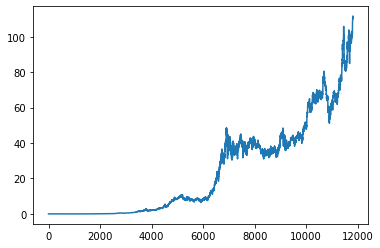

In [10]:
plt.plot(df.y)

* instantiate Prophet

In [11]:
m = Prophet()

* fit model

In [12]:
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'metric_file'

* forecast 365 values in future 

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

* plot forecast

In [1]:
import pandas
pandas.__version__

'1.2.4'

* plot components

In [2]:
df.tail()

NameError: name 'df' is not defined

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
model = ARIMA(df)
model_fit = model.fit()
yhat = model_fit.forecast()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).